Importation les Bibliothéques et les packages :

In [1]:
from ast import Break
from numpy.core import numeric
from numpy.core.defchararray import index, upper
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.core.arrays.sparse import dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import math

Imporattion de data :

In [ ]:
df = pd.read_csv(r'/Users/yassinelatif/Desktop/Project S5/datal3_v1.csv')
df.head()

Fixing the date format:

In [3]:
df["DATE_RELEVEE"] = pd.to_datetime(df["DATE_RELEVEE"])
df["DATE_CHARGEMENT"] = pd.to_datetime(df["DATE_CHARGEMENT"])
df["DATE_DEMARRAGE"] = pd.to_datetime(df["DATE_DEMARRAGE"])

Handling missing values:

In [4]:
# Afficher est ce qu'elle y a des valeur manquantes dans toutes les colonnes de dataframe :
print(df.isnull().values.any())

True


In [5]:
#Afficher la somme des valeurs manquantes dans chaque colonne :
print(df.isnull().sum())

DATE_CHARGEMENT      0
DATE_RELEVEE         0
DATE_DEMARRAGE       0
sensor1              0
sensor2              0
sensor3              0
sensor4              0
sensor5            167
sensor6            167
sensor7              0
sensor8              0
sensor9              0
sensor10             0
sensor11             0
sensor12           120
sensor13             0
sensor14             0
sensor15             0
sensor16             0
sensor17             0
sensor18             0
PANNE                0
dtype: int64


In [6]:
#Detecter les colonnes qui ne varient pas pour les supprimer:
print(df.nunique())

DATE_CHARGEMENT    20438
DATE_RELEVEE       20438
DATE_DEMARRAGE     20438
sensor1              158
sensor2               13
sensor3                1
sensor4              310
sensor5             3007
sensor6             4028
sensor7              513
sensor8               53
sensor9             6402
sensor10             159
sensor11             427
sensor12              56
sensor13            6062
sensor14            1918
sensor15              13
sensor16             120
sensor17            4730
sensor18               1
PANNE                  2
dtype: int64


On remarque que les colonnes sensor 3 et sensor 18 ne varient pas donc il faut les supprimer 

In [7]:
#Suppression les colonnes sensor3 et sensor18 :
df.drop('sensor3', inplace=True, axis=1)
df.drop('sensor18', inplace=True, axis=1)

In [8]:
#ajouter une colonne qui contient les heures de saisie:
df['hours'] = df['DATE_RELEVEE'].dt.hour

In [9]:
#Cleaning missing values :
L = []
for i in df.columns:
    for ind, j in enumerate(df[i].isnull()):
      if j==True:
        for s, k in enumerate(df['hours']):
          if k==df.loc[ind, 'hours']:
            if math.isnan(df.loc[s,i]):
              s+1
            else:
              L.append(df.loc[s,i])
  
        n = sum(L)/len(L)
        df.at[ind, i] = n

Verification de nettoyages des valeurs manquantes :

In [10]:
print(df.isnull().values.any())

False


In [11]:
print(df.isnull().sum())

DATE_CHARGEMENT    0
DATE_RELEVEE       0
DATE_DEMARRAGE     0
sensor1            0
sensor2            0
sensor4            0
sensor5            0
sensor6            0
sensor7            0
sensor8            0
sensor9            0
sensor10           0
sensor11           0
sensor12           0
sensor13           0
sensor14           0
sensor15           0
sensor16           0
sensor17           0
PANNE              0
hours              0
dtype: int64


Donc on remarque que notre dataset a été nettoyer avec succés 

Dealing with outliers:

Ploting outliers :

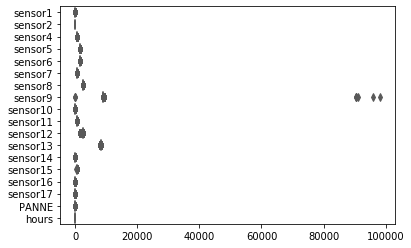

In [12]:
fig, axs = plt.subplots()
sns.boxplot(data=df,orient='h',palette="Set2")
plt.show()

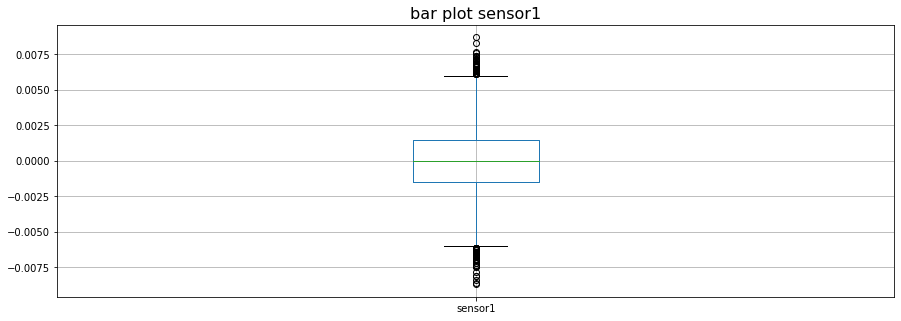

In [13]:
df1=df[['sensor1']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor1",fontsize=16)
plt.show()

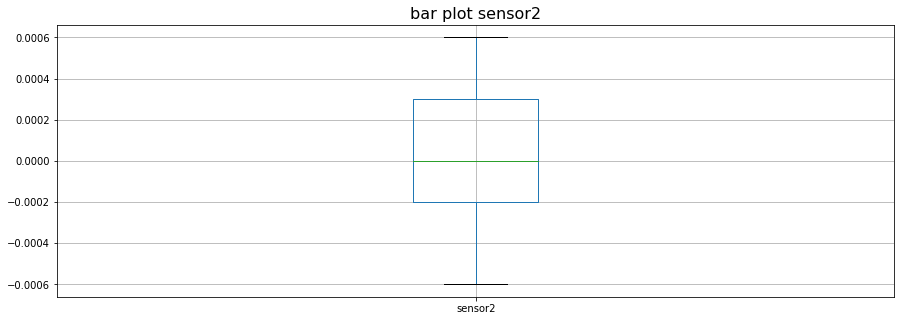

In [14]:
df1=df[['sensor2']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor2",fontsize=16)
plt.show()

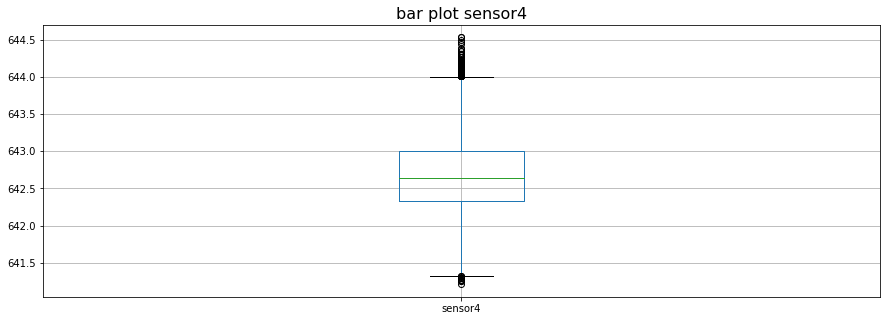

In [15]:
df1=df[['sensor4']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor4",fontsize=16)
plt.show()

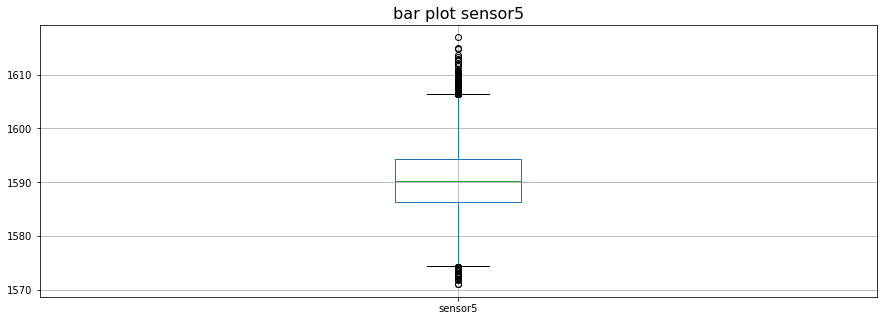

In [16]:
df1=df[['sensor5']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor5",fontsize=16)
plt.show()

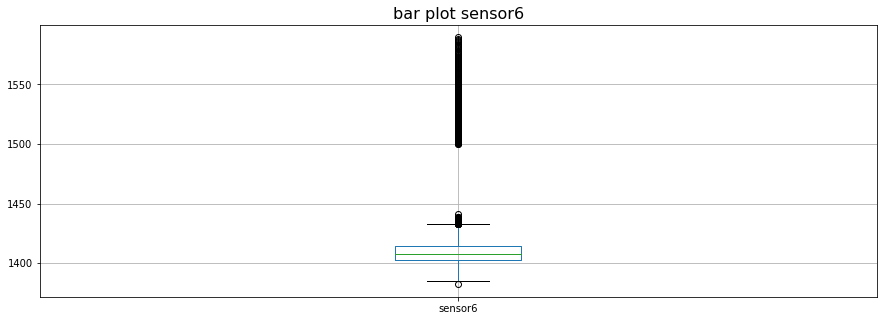

In [17]:
df1=df[['sensor6']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor6",fontsize=16)
plt.show()

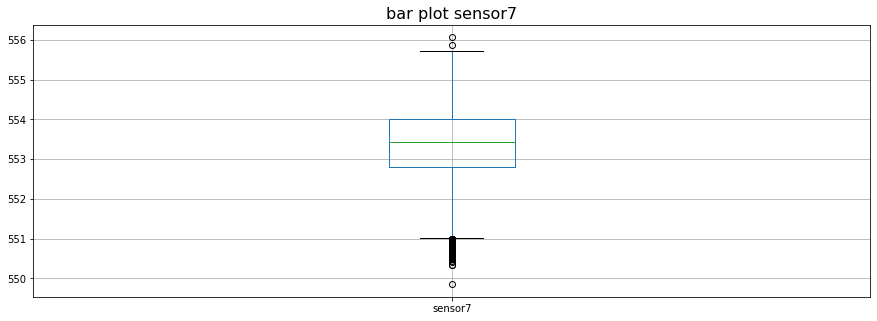

In [18]:
df1=df[['sensor7']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor7",fontsize=16)
plt.show()

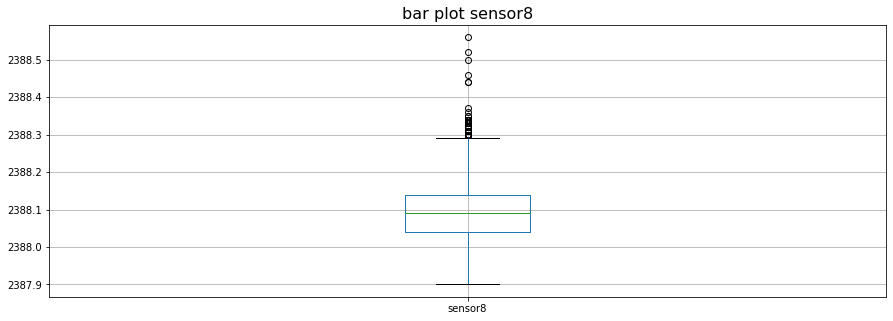

In [19]:
df1=df[['sensor8']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor8",fontsize=16)
plt.show()

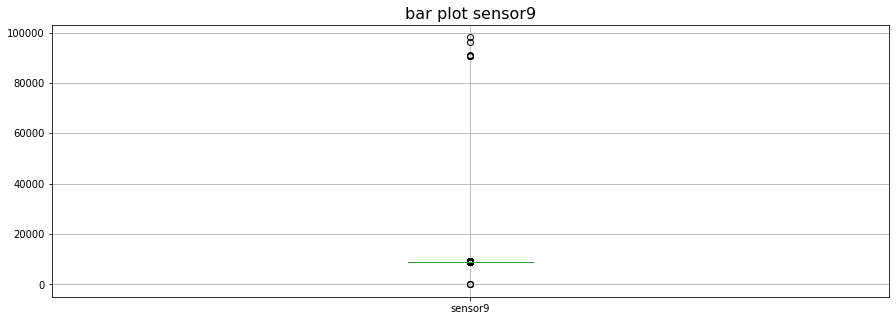

In [20]:
df1=df[['sensor9']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor9",fontsize=16)
plt.show()

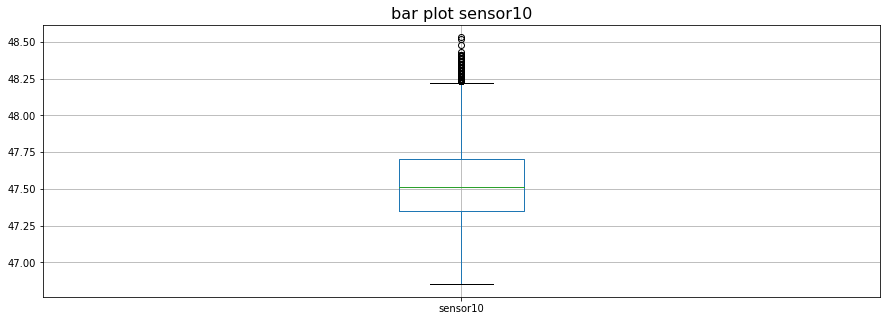

In [21]:
df1=df[['sensor10']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor10",fontsize=16)
plt.show()

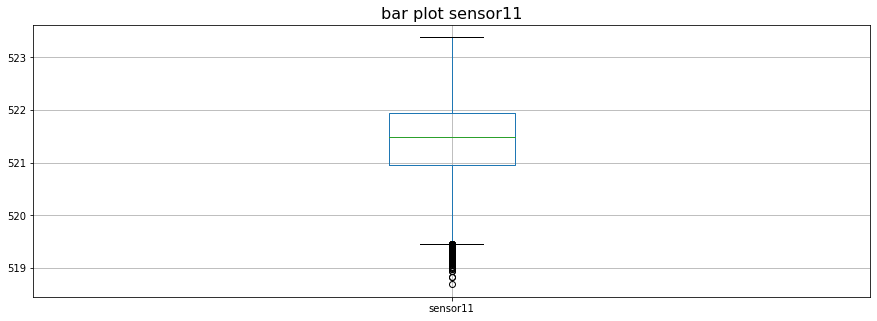

In [22]:
df1=df[['sensor11']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor11",fontsize=16)
plt.show()

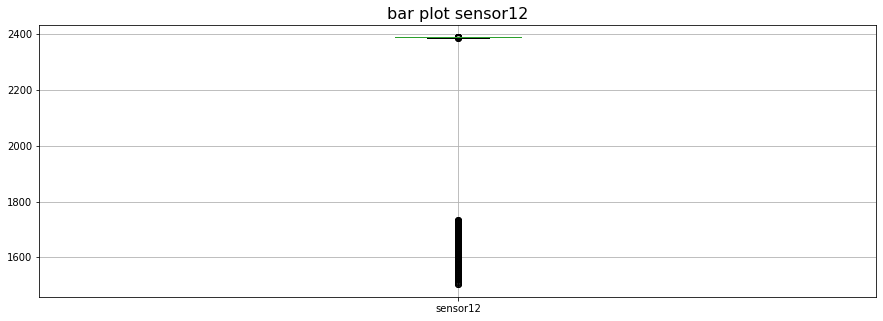

In [23]:
df1=df[['sensor12']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor12",fontsize=16)
plt.show()

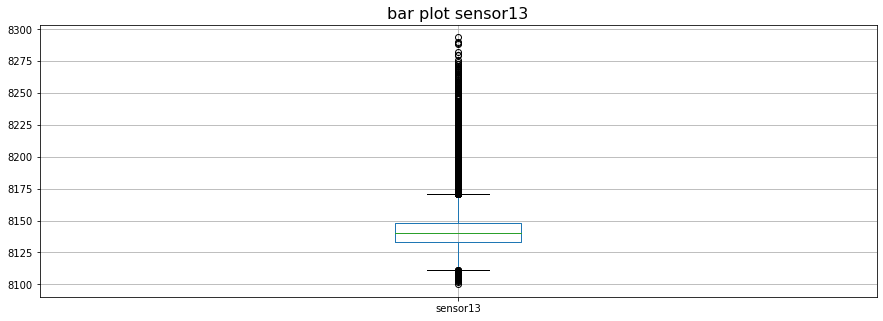

In [24]:
df1=df[['sensor13']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor13",fontsize=16)
plt.show()

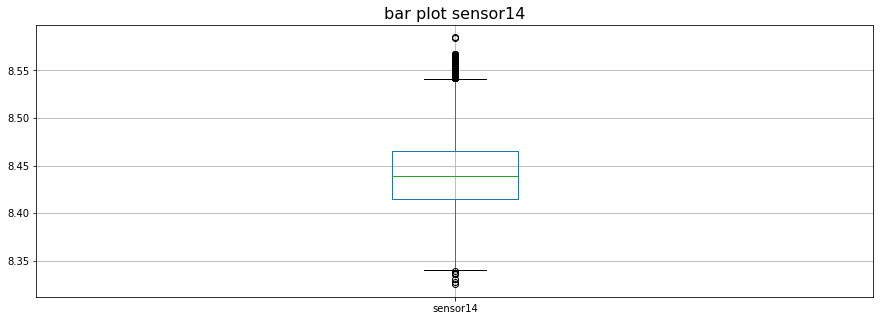

In [25]:
df1=df[['sensor14']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor14",fontsize=16)
plt.show()

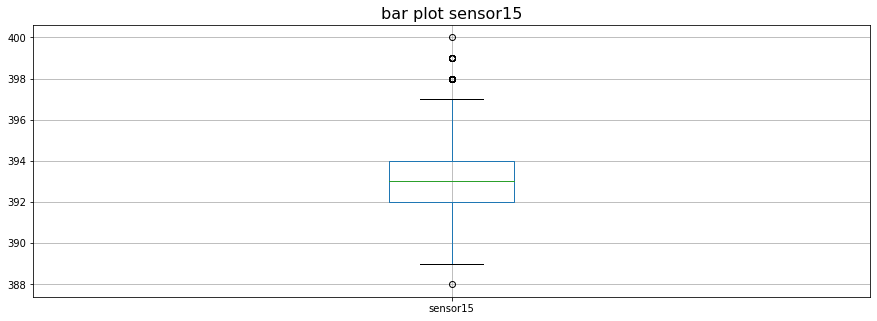

In [26]:
df1=df[['sensor15']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor15",fontsize=16)
plt.show()

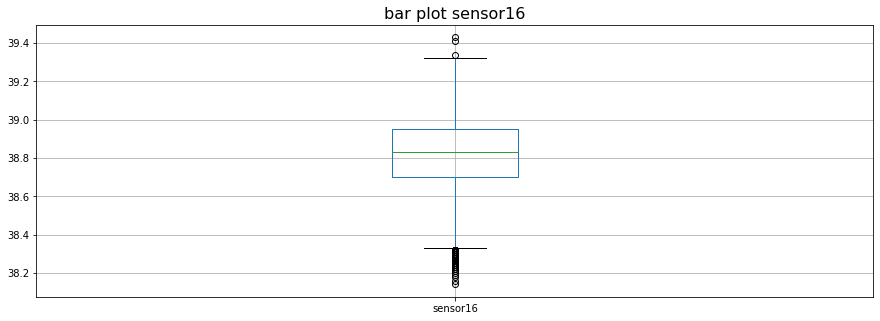

In [27]:
df1=df[['sensor16']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor16",fontsize=16)
plt.show()

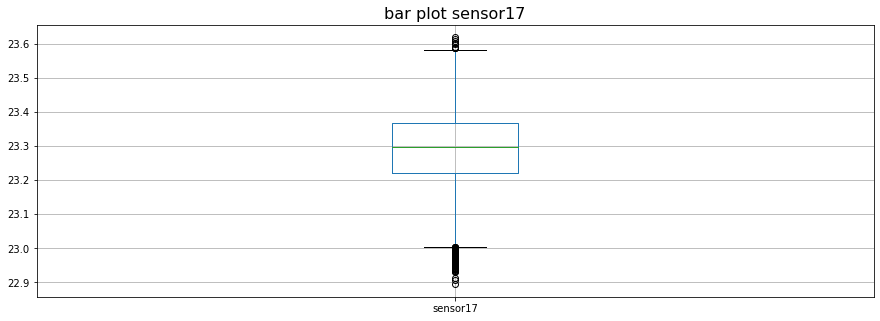

In [28]:
df1=df[['sensor17']]
df1.boxplot(figsize=(15,5))
plt.title("bar plot sensor17",fontsize=16)
plt.show()

Detectation des outliers par KNN :

In [29]:
df['ind']=df.index

In [30]:
out1=df[['ind', 'sensor1']]
out2=df[['ind', 'sensor2']]
out4=df[['ind', 'sensor4']]
out5=df[['ind', 'sensor5']]
out6=df[['ind', 'sensor6']]
out7=df[['ind', 'sensor7']]
out8=df[['ind', 'sensor8']]
out9=df[['ind', 'sensor9']]
out10=df[['ind', 'sensor10']]
out11=df[['ind', 'sensor11']]
out12=df[['ind', 'sensor12']]
out13=df[['ind', 'sensor13']]
out14=df[['ind', 'sensor14']]
out15=df[['ind', 'sensor15']]
out16=df[['ind', 'sensor16']]
out17=df[['ind', 'sensor17']]

In [31]:
from pyod.models.knn import KNN

KNN_model1 = KNN()

# Fit the model to the whole dataset
KNN_model1.fit(out1)


# Find the labels
outlier_labels1 = KNN_model1.labels_


# Find the number of outliers
number_of_outliers1 = len(outlier_labels1[outlier_labels1 == 1])

print('number of outliers in sensor1: ', number_of_outliers1)

number of outliers in sensor1:  1922


In [32]:
KNN_model2 = KNN()

# Fit the model to the whole dataset
KNN_model2.fit(out2)


# Find the labels
outlier_labels2 = KNN_model2.labels_


# Find the number of outliers
number_of_outliers2 = len(outlier_labels2[outlier_labels2 == 1])

print('number of outliers in sensor2: ', number_of_outliers2)

number of outliers in sensor2:  1255


In [33]:
KNN_model4 = KNN()

# Fit the model to the whole dataset
KNN_model4.fit(out4)


# Find the labels
outlier_labels4 = KNN_model4.labels_


# Find the number of outliers
number_of_outliers4 = len(outlier_labels4[outlier_labels4 == 1])

print('number of outliers in sensor4: ', number_of_outliers4)

number of outliers in sensor4:  2002


In [34]:
KNN_model5 = KNN()

# Fit the model to the whole dataset
KNN_model5.fit(out5)


# Find the labels
outlier_labels5 = KNN_model5.labels_


# Find the number of outliers
number_of_outliers5 = len(outlier_labels5[outlier_labels5 == 1])

print('number of outliers in sensor5: ', number_of_outliers5)

number of outliers in sensor5:  2043


In [35]:
KNN_model6 = KNN()

# Fit the model to the whole dataset
KNN_model6.fit(out6)


# Find the labels
outlier_labels6 = KNN_model6.labels_


# Find the number of outliers
number_of_outliers6 = len(outlier_labels6[outlier_labels6 == 1])

print('number of outliers in sensor6: ', number_of_outliers6)

number of outliers in sensor6:  2041


In [36]:
KNN_model7 = KNN()

# Fit the model to the whole dataset
KNN_model7.fit(out7)


# Find the labels
outlier_labels7 = KNN_model7.labels_


# Find the number of outliers
number_of_outliers7 = len(outlier_labels7[outlier_labels7 == 1])

print('number of outliers in sensor7: ', number_of_outliers7)

number of outliers in sensor7:  2027


In [37]:
KNN_model8 = KNN()

# Fit the model to the whole dataset
KNN_model8.fit(out8)


# Find the labels
outlier_labels8 = KNN_model8.labels_


# Find the number of outliers
number_of_outliers8 = len(outlier_labels8[outlier_labels8 == 1])

print('number of outliers in sensor8: ', number_of_outliers8)

number of outliers in sensor8:  2010


In [38]:
KNN_model9 = KNN()

# Fit the model to the whole dataset
KNN_model9.fit(out9)


# Find the labels
outlier_labels9 = KNN_model9.labels_


# Find the number of outliers
number_of_outliers9 = len(outlier_labels9[outlier_labels9 == 1])

print('number of outliers in sensor9: ', number_of_outliers9)

number of outliers in sensor9:  2044


In [39]:
KNN_model10 = KNN()

# Fit the model to the whole dataset
KNN_model10.fit(out10)


# Find the labels
outlier_labels10 = KNN_model10.labels_


# Find the number of outliers
number_of_outliers10 = len(outlier_labels10[outlier_labels10 == 1])

print('number of outliers in sensor10: ', number_of_outliers10)

number of outliers in sensor10:  1986


In [40]:
KNN_model11 = KNN()

# Fit the model to the whole dataset
KNN_model11.fit(out11)


# Find the labels
outlier_labels11 = KNN_model11.labels_


# Find the number of outliers
number_of_outliers11 = len(outlier_labels11[outlier_labels11 == 1])

print('number of outliers in sensor11: ', number_of_outliers11)

number of outliers in sensor11:  1980


In [41]:
KNN_model12 = KNN()

# Fit the model to the whole dataset
KNN_model12.fit(out12)


# Find the labels
outlier_labels12 = KNN_model12.labels_


# Find the number of outliers
number_of_outliers12 = len(outlier_labels12[outlier_labels12 == 1])

print('number of outliers in sensor12: ', number_of_outliers12)

number of outliers in sensor12:  1582


In [42]:
KNN_model13 = KNN()

# Fit the model to the whole dataset
KNN_model13.fit(out13)


# Find the labels
outlier_labels13 = KNN_model13.labels_


# Find the number of outliers
number_of_outliers13 = len(outlier_labels13[outlier_labels13 == 1])

print('number of outliers in sensor13: ', number_of_outliers13)

number of outliers in sensor13:  2044


In [43]:
KNN_model14 = KNN()

# Fit the model to the whole dataset
KNN_model14.fit(out14)


# Find the labels
outlier_labels14 = KNN_model14.labels_


# Find the number of outliers
number_of_outliers14 = len(outlier_labels14[outlier_labels14 == 1])

print('number of outliers in sensor14: ', number_of_outliers14)

number of outliers in sensor14:  2037


In [44]:
KNN_model15 = KNN()

# Fit the model to the whole dataset
KNN_model15.fit(out15)


# Find the labels
outlier_labels15 = KNN_model15.labels_


# Find the number of outliers
number_of_outliers15 = len(outlier_labels15[outlier_labels15 == 1])

print('number of outliers in sensor15: ', number_of_outliers15)

number of outliers in sensor15:  741


In [45]:
KNN_model16 = KNN()

# Fit the model to the whole dataset
KNN_model16.fit(out16)


# Find the labels
outlier_labels16 = KNN_model16.labels_


# Find the number of outliers
number_of_outliers16 = len(outlier_labels16[outlier_labels16 == 1])

print('number of outliers in sensor16: ', number_of_outliers16)

number of outliers in sensor16:  1985


In [46]:
KNN_model17 = KNN()

# Fit the model to the whole dataset
KNN_model17.fit(out17)


# Find the labels
outlier_labels17 = KNN_model17.labels_


# Find the number of outliers
number_of_outliers17 = len(outlier_labels17[outlier_labels17 == 1])

print('number of outliers in sensor17: ', number_of_outliers17)

number of outliers in sensor17:  2037


In [47]:
print('Pourcentage in sensor1: ', (number_of_outliers1/len(df))*100,'%')
print('Pourcentage in sensor2: ', (number_of_outliers2/len(df))*100,'%')
print('Pourcentage in sensor4: ', (number_of_outliers4/len(df))*100,'%')
print('Pourcentage in sensor5: ', (number_of_outliers5/len(df))*100,'%')
print('Pourcentage in sensor6: ', (number_of_outliers6/len(df))*100,'%')
print('Pourcentage in sensor7: ', (number_of_outliers7/len(df))*100,'%')
print('Pourcentage in sensor8: ', (number_of_outliers8/len(df))*100,'%')
print('Pourcentage in sensor9: ', (number_of_outliers9/len(df))*100,'%')
print('Pourcentage in sensor10: ', (number_of_outliers10/len(df))*100,'%')
print('Pourcentage in sensor11: ', (number_of_outliers11/len(df))*100,'%')
print('Pourcentage in sensor12: ', (number_of_outliers12/len(df))*100,'%')
print('Pourcentage in sensor13: ', (number_of_outliers13/len(df))*100,'%')
print('Pourcentage in sensor14: ', (number_of_outliers14/len(df))*100,'%')
print('Pourcentage in sensor15: ', (number_of_outliers15/len(df))*100,'%')
print('Pourcentage in sensor16: ', (number_of_outliers16/len(df))*100,'%')
print('Pourcentage in sensor17: ', (number_of_outliers17/len(df))*100,'%')
print('Pourcentage sur toute la dataset: ', ((number_of_outliers1+number_of_outliers2+number_of_outliers4+number_of_outliers5+
      number_of_outliers6+number_of_outliers7+number_of_outliers8+number_of_outliers9+number_of_outliers10+number_of_outliers11+
      number_of_outliers12+number_of_outliers13+number_of_outliers14+number_of_outliers15+number_of_outliers16+number_of_outliers17)/(len(df)*16))*100,'%')

Pourcentage in sensor1:  9.404051277032979 %
Pourcentage in sensor2:  6.140522556023095 %
Pourcentage in sensor4:  9.795479009687837 %
Pourcentage in sensor5:  9.996085722673453 %
Pourcentage in sensor6:  9.98630002935708 %
Pourcentage in sensor7:  9.91780017614248 %
Pourcentage in sensor8:  9.834621782953322 %
Pourcentage in sensor9:  10.000978569331636 %
Pourcentage in sensor10:  9.717193463156864 %
Pourcentage in sensor11:  9.68783638320775 %
Pourcentage in sensor12:  7.740483413249828 %
Pourcentage in sensor13:  10.000978569331636 %
Pourcentage in sensor14:  9.966728642724338 %
Pourcentage in sensor15:  3.625599373715628 %
Pourcentage in sensor16:  9.712300616498679 %
Pourcentage in sensor17:  9.966728642724338 %
Pourcentage sur toute la dataset:  9.093355514238183 %


In [48]:
# Finding the outlier passengers
outliers1 = out1.iloc[outlier_labels1 == 1]
outliers2 = out2.iloc[outlier_labels2 == 1]
outliers4 = out4.iloc[outlier_labels4 == 1]
outliers5 = out5.iloc[outlier_labels5 == 1]
outliers6 = out6.iloc[outlier_labels6 == 1]
outliers7 = out7.iloc[outlier_labels7 == 1]
outliers8 = out8.iloc[outlier_labels8 == 1]
outliers9 = out9.iloc[outlier_labels9 == 1]
outliers10 = out10.iloc[outlier_labels10 == 1]
outliers11 = out11.iloc[outlier_labels11 == 1]
outliers12 = out12.iloc[outlier_labels12 == 1]
outliers13 = out13.iloc[outlier_labels13 == 1]
outliers14 = out14.iloc[outlier_labels14 == 1]
outliers15 = out15.iloc[outlier_labels15 == 1]
outliers16 = out16.iloc[outlier_labels16 == 1]
outliers17 = out17.iloc[outlier_labels17 == 1]

Affichage de outliers1 :

In [49]:
outliers1

,ind,sensor1
0,0,0.0043
1,1,0.0018
8,8,-0.0045
18,18,0.0042
29,29,-0.0009
...,...,...
20380,20380,-0.0031
20404,20404,0.0018
20407,20407,-0.0034
20436,20436,-0.0011


In [50]:
def Handling_Outliers(outliers, data):
    c=0
    n=0
    L=[]
    d1=pd.DataFrame(data.drop(outliers.index.tolist()), columns=[outliers.columns[1]])
    for o in outliers.ind:
            if data.loc[o,'PANNE']==0:
                #data.at[o, outliers.columns[1]] = (abs(min(data[outliers.columns[1]]))+max(data[outliers.columns[1]]))/6
                for s, k in enumerate(data['hours']):
                    if k==data.loc[o, 'hours']:
                        #d1=data[outliers.columns[1]].drop(index=[outliers.index[1:]], axis=0)
                        if s in d1.index:
                            n+=1
                            L.append(d1.loc[s,outliers.columns[1]])
                        else:
                            s+=1
                    else:
                        s+1
                data.at[o, outliers.columns[1]] = sum(L)/n
    return data

In [51]:
o1=Handling_Outliers(outliers1,df[['sensor1','PANNE','hours']])
o2=Handling_Outliers(outliers2,df[['sensor2','PANNE','hours']])
o4=Handling_Outliers(outliers4,df[['sensor4','PANNE','hours']])
o5=Handling_Outliers(outliers5,df[['sensor5','PANNE','hours']])
o6=Handling_Outliers(outliers6,df[['sensor6','PANNE','hours']])
o7=Handling_Outliers(outliers7,df[['sensor7','PANNE','hours']])
o8=Handling_Outliers(outliers8,df[['sensor8','PANNE','hours']])
o9=Handling_Outliers(outliers9,df[['sensor9','PANNE','hours']])
o10=Handling_Outliers(outliers10,df[['sensor10','PANNE','hours']])
o11=Handling_Outliers(outliers11,df[['sensor11','PANNE','hours']])
o12=Handling_Outliers(outliers12,df[['sensor12','PANNE','hours']])
o13=Handling_Outliers(outliers13,df[['sensor13','PANNE','hours']])
o13=Handling_Outliers(outliers13,df[['sensor13','PANNE','hours']])
o14=Handling_Outliers(outliers14,df[['sensor14','PANNE','hours']])
o15=Handling_Outliers(outliers15,df[['sensor15','PANNE','hours']])
o16=Handling_Outliers(outliers16,df[['sensor16','PANNE','hours']])
o17=Handling_Outliers(outliers17,df[['sensor17','PANNE','hours']])

KeyboardInterrupt: 

In [ ]:
dff = pd.concat([df[["DATE_CHARGEMENT", "DATE_DEMARRAGE","DATE_RELEVEE"]],o1,o2,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,o14,o15,o16,o17,df[['PANNE','hours']]], axis=1)

Transformation de dataframe to fichier csv :

In [ ]:
dff.to_csv(r'out.csv', index=False)

In [ ]:
#methode 2: Suppression des outliers

In [ ]:
d1=pd.DataFrame(df['sensor1'].drop(outliers1.index.tolist()), columns=[outliers1.columns[1]])
d2=pd.DataFrame(df['sensor2'].drop(outliers2.index.tolist()), columns=[outliers2.columns[1]])
d4=pd.DataFrame(df['sensor4'].drop(outliers4.index.tolist()), columns=[outliers4.columns[1]])
d5=pd.DataFrame(df['sensor5'].drop(outliers5.index.tolist()), columns=[outliers5.columns[1]])
d6=pd.DataFrame(df['sensor6'].drop(outliers6.index.tolist()), columns=[outliers6.columns[1]])
d7=pd.DataFrame(df['sensor7'].drop(outliers7.index.tolist()), columns=[outliers7.columns[1]])
d8=pd.DataFrame(df['sensor8'].drop(outliers8.index.tolist()), columns=[outliers8.columns[1]])
d9=pd.DataFrame(df['sensor8'].drop(outliers9.index.tolist()), columns=[outliers9.columns[1]])
d10=pd.DataFrame(df['sensor10'].drop(outliers10.index.tolist()), columns=[outliers10.columns[1]])
d11=pd.DataFrame(df['sensor11'].drop(outliers11.index.tolist()), columns=[outliers11.columns[1]])
d12=pd.DataFrame(df['sensor12'].drop(outliers12.index.tolist()), columns=[outliers12.columns[1]])
d13=pd.DataFrame(df['sensor13'].drop(outliers13.index.tolist()), columns=[outliers13.columns[1]])
d14=pd.DataFrame(df['sensor14'].drop(outliers14.index.tolist()), columns=[outliers14.columns[1]])
d15=pd.DataFrame(df['sensor15'].drop(outliers15.index.tolist()), columns=[outliers15.columns[1]])
d16=pd.DataFrame(df['sensor16'].drop(outliers16.index.tolist()), columns=[outliers16.columns[1]])
d17=pd.DataFrame(df['sensor17'].drop(outliers17.index.tolist()), columns=[outliers17.columns[1]])

In [ ]:
dff = pd.concat([df[["DATE_CHARGEMENT", "DATE_DEMARRAGE","DATE_RELEVEE"]],d1,d2,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17, df[['PANNE','hours']]], axis=1)

In [ ]:
df= df.fillna(df.mean())
df.isnull().sum()
df=df.drop('sensor9', axis=1)
df.to_csv(r'C:\Users\dell\Documents\Module_projet\out_suppp.csv', index=False)

Importation de noveau cleaning dataset : 

In [52]:
df = pd.read_csv(r'/Users/yassinelatif/Desktop/Project S5/outt.csv')
df.head()

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours
0,2019-01-09 16:00:00,2019-01-09 16:00:00,2019-01-09 16:00:00,0.000040,0.000002,642.676374,1590.634927,1410.401203,553.356463,2388.099139,...,47.539865,521.422689,2388.095487,8142.600426,8.442764,393,38.816382,23.290441,0,16
1,2019-01-09 17:00:00,2019-01-09 17:00:00,2019-01-09 17:00:00,0.000079,0.000002,642.685267,1590.492607,1398.960000,553.365580,2388.098127,...,47.539865,521.422689,2388.095487,8142.600426,8.442888,393,38.816298,23.288579,0,17
2,2019-01-09 18:00:00,2019-01-09 18:00:00,2019-01-09 18:00:00,0.003500,-0.000400,641.680000,1584.150000,1396.080000,554.250000,2388.097326,...,47.100000,522.490000,2388.095487,8140.440000,8.401800,391,39.130000,23.502700,0,18
3,2019-01-09 19:00:00,2019-01-09 19:00:00,2019-01-09 19:00:00,0.000500,0.000002,641.730000,1590.509320,1402.520000,555.120000,2388.030000,...,47.250000,522.270000,2387.940000,8136.670000,8.386700,390,39.180000,23.423400,0,19
4,2019-01-09 20:00:00,2019-01-09 20:00:00,2019-01-09 20:00:00,-0.001000,0.000400,641.300000,1590.522982,1396.760000,554.980000,2388.040000,...,47.050000,522.800000,2387.990000,8133.650000,8.380000,392,39.150000,23.427000,0,20


In [53]:
df["DATE_RELEVEE"] = pd.to_datetime(df["DATE_RELEVEE"])
df["DATE_CHARGEMENT"] = pd.to_datetime(df["DATE_CHARGEMENT"])
df["DATE_DEMARRAGE"] = pd.to_datetime(df["DATE_DEMARRAGE"])

Normalisation Dataset :

In [54]:
min_max_scaler = preprocessing.MinMaxScaler()
cols_normalize = ['sensor1', 'sensor2','sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9'
                , 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16'
                , 'sensor17']
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df[cols_normalize]),
                             columns=cols_normalize,
                             index=df.index)
join_df = df[df.columns.difference(cols_normalize)].join(norm_df)
df=join_df.reindex(columns=df.columns)
df.head()

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours
0,2019-01-09 16:00:00,2019-01-09 16:00:00,2019-01-09 16:00:00,0.492193,0.501985,0.447139,0.472630,0.114529,0.580089,0.398086,...,0.431284,0.543750,0.999615,0.255927,0.480000,0.4,0.547139,0.554951,0,16
1,2019-01-09 17:00:00,2019-01-09 17:00:00,2019-01-09 17:00:00,0.494996,0.501985,0.449927,0.468812,0.057610,0.581842,0.395838,...,0.431284,0.543750,0.999615,0.255927,0.480528,0.4,0.547062,0.552080,0,17
2,2019-01-09 18:00:00,2019-01-09 18:00:00,2019-01-09 18:00:00,0.737589,0.166667,0.134796,0.298632,0.043282,0.751923,0.394057,...,0.143791,0.792541,0.999615,0.242966,0.305164,0.2,0.834862,0.882208,0,18
3,2019-01-09 19:00:00,2019-01-09 19:00:00,2019-01-09 19:00:00,0.524823,0.501985,0.150470,0.469260,0.075321,0.919231,0.244444,...,0.241830,0.741259,0.999389,0.220349,0.240717,0.1,0.880734,0.759944,0,19
4,2019-01-09 20:00:00,2019-01-09 20:00:00,2019-01-09 20:00:00,0.418440,0.833333,0.015674,0.469627,0.046665,0.892308,0.266667,...,0.111111,0.864802,0.999462,0.202232,0.212121,0.3,0.853211,0.765495,0,20


Generating the target feature RUL (Remaining Useful Life):

In [55]:
fr = df['PANNE'].eq(1)
df['hours'] = df['PANNE'].ne(1).groupby(fr.cumsum()).cumsum().add(1)
fr = df['PANNE'].eq(2)
df['id'] = df['PANNE'].ne(0).groupby(fr.cumsum()).cumsum().add(1)
rul = pd.DataFrame(df.groupby('id')['hours'].max()).reset_index()
rul.columns = ['id', 'max']
df = df.merge(rul, on=['id'], how='left')
df['RUL'] = df['max'] - df['hours']
df.drop('max', axis=1, inplace=True)
df

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours,id,RUL
0,2019-01-09 16:00:00,2019-01-09 16:00:00,2019-01-09 16:00:00,0.492193,0.501985,0.447139,0.472630,0.114529,0.580089,0.398086,...,0.999615,0.255927,0.480000,0.4,0.547139,0.554951,0,2,1,285
1,2019-01-09 17:00:00,2019-01-09 17:00:00,2019-01-09 17:00:00,0.494996,0.501985,0.449927,0.468812,0.057610,0.581842,0.395838,...,0.999615,0.255927,0.480528,0.4,0.547062,0.552080,0,3,1,284
2,2019-01-09 18:00:00,2019-01-09 18:00:00,2019-01-09 18:00:00,0.737589,0.166667,0.134796,0.298632,0.043282,0.751923,0.394057,...,0.999615,0.242966,0.305164,0.2,0.834862,0.882208,0,4,1,283
3,2019-01-09 19:00:00,2019-01-09 19:00:00,2019-01-09 19:00:00,0.524823,0.501985,0.150470,0.469260,0.075321,0.919231,0.244444,...,0.999389,0.220349,0.240717,0.1,0.880734,0.759944,0,5,1,282
4,2019-01-09 20:00:00,2019-01-09 20:00:00,2019-01-09 20:00:00,0.418440,0.833333,0.015674,0.469627,0.046665,0.892308,0.266667,...,0.999462,0.202232,0.212121,0.3,0.853211,0.765495,0,6,1,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20433,2021-05-10 01:00:00,2021-05-10 01:00:00,2021-05-10 01:00:00,0.460993,0.250000,0.702194,0.669708,0.205216,0.209615,0.392665,...,0.999854,0.225928,0.476516,0.8,0.247706,0.066297,0,196,99,4
20434,2021-05-10 02:00:00,2021-05-10 02:00:00,2021-05-10 02:00:00,0.375887,0.083333,0.717868,0.844647,0.229842,0.100000,0.688889,...,0.999796,0.219329,0.783611,0.6,0.073394,0.352914,0,197,99,3
20435,2021-05-10 03:00:00,2021-05-10 03:00:00,2021-05-10 03:00:00,0.517730,0.500000,0.680251,0.789911,0.202977,0.115385,0.711111,...,0.999825,0.246625,1.000000,0.4,0.547523,0.554991,0,198,99,2
20436,2021-05-10 04:00:00,2021-05-10 04:00:00,2021-05-10 04:00:00,0.489991,0.501985,0.447811,0.469695,0.194769,0.583858,0.392665,...,0.999615,0.236067,0.476517,0.4,0.547522,0.554991,0,199,99,1


Features Selection Random Forest

In [56]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [57]:
X=df.loc[:, 'sensor1':'sensor17']
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [58]:
rf = RandomForestRegressor(n_estimators=100, random_state = 20)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=20)

In [59]:
rf.feature_importances_

array([0.0236623 , 0.01417371, 0.02660946, 0.03120473, 0.09937403,
       0.03342263, 0.02020436, 0.11635675, 0.42222157, 0.04284294,
       0.02243916, 0.04107676, 0.03423101, 0.00857396, 0.02591623,
       0.03769039])

Text(0.5, 0, 'Random Forest Feature Importance')

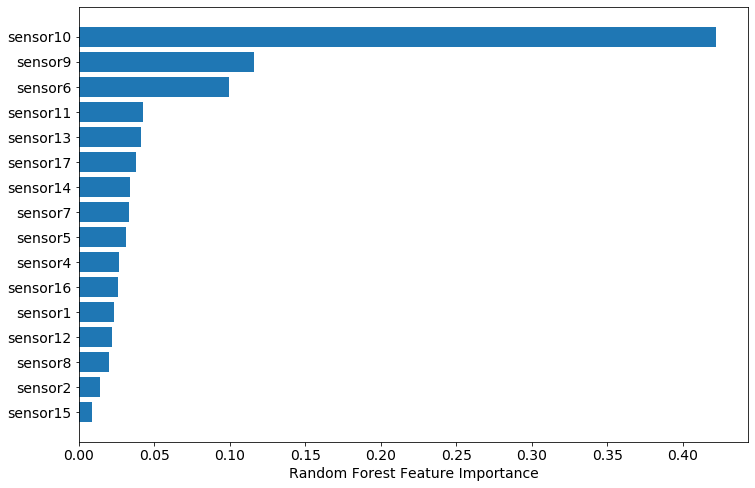

In [60]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.loc[:, 'sensor1':'sensor17'].columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Features Selection Information gain : 

In [61]:
from sklearn.feature_selection import mutual_info_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00086525, 0.        , 0.33363049, 0.32134228, 0.48237917,
       0.40214171, 0.24481851, 0.19040876, 0.47850831, 0.42051613,
       0.26376609, 0.19910766, 0.38747608, 0.33004831, 0.37377222,
       0.38338742])

In [62]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

sensor6     0.482379
sensor10    0.478508
sensor11    0.420516
sensor7     0.402142
sensor14    0.387476
sensor17    0.383387
sensor16    0.373772
sensor4     0.333630
sensor15    0.330048
sensor5     0.321342
sensor12    0.263766
sensor8     0.244819
sensor13    0.199108
sensor9     0.190409
sensor1     0.000865
sensor2     0.000000
dtype: float64

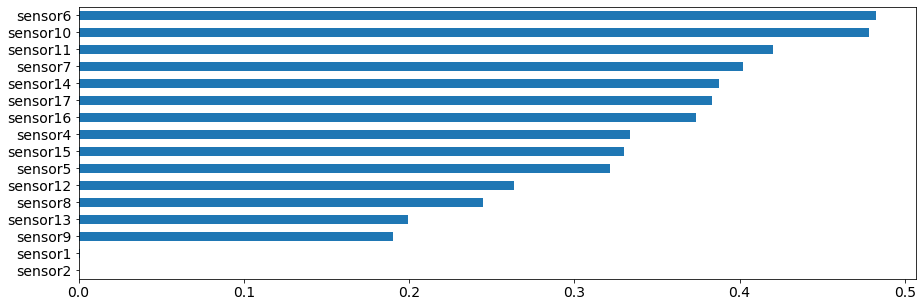

In [63]:
mutual_info.sort_values(ascending=True).plot.barh(figsize=(15,5))

In [64]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)
selected_top_columns.get_support()

array([False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False])

In [65]:
X_train.columns[selected_top_columns.get_support()]

Index(['sensor6', 'sensor10', 'sensor11'], dtype='object')

Features Selection Xgboost :

In [66]:
import numpy as np
import pandas as pd
import shap
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

In [67]:
X=df.loc[:, 'sensor1':'sensor17']
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [68]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
xgb.feature_importances_

array([0.00894074, 0.00922717, 0.02898269, 0.02104538, 0.08595874,
       0.04875185, 0.02025577, 0.08074075, 0.4382502 , 0.03469028,
       0.02618272, 0.04013287, 0.03626036, 0.03464426, 0.04029574,
       0.04564047], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

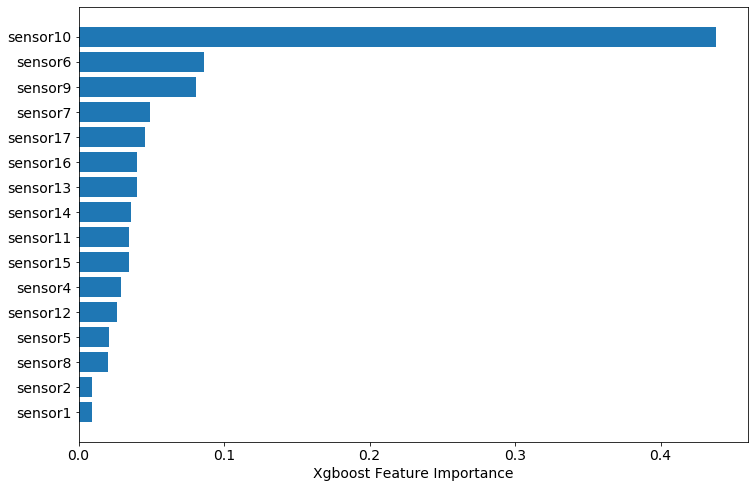

In [70]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(df.loc[:, 'sensor1':'sensor17'].columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Permutation Based Feature Importance :

In [71]:
perm_importance = permutation_importance(xgb, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

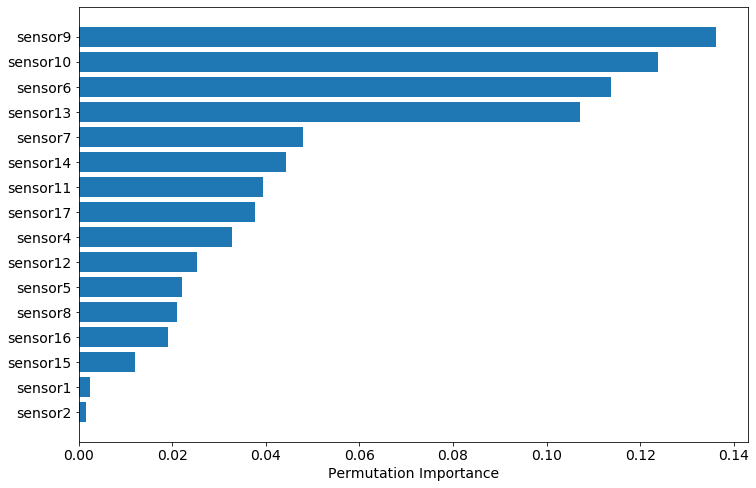

In [72]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.loc[:, 'sensor1':'sensor17'].columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Feature Importance Computed with SHAP Values

In [73]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


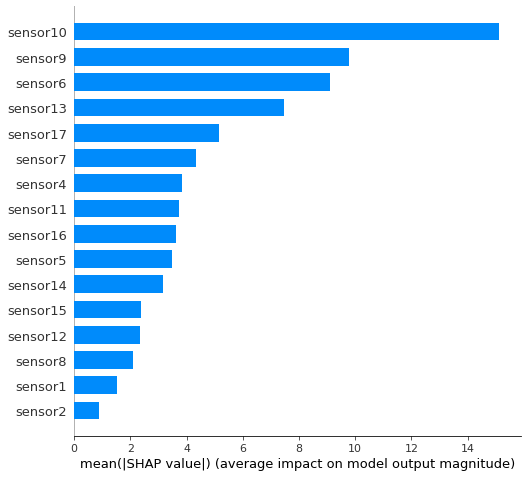

In [74]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

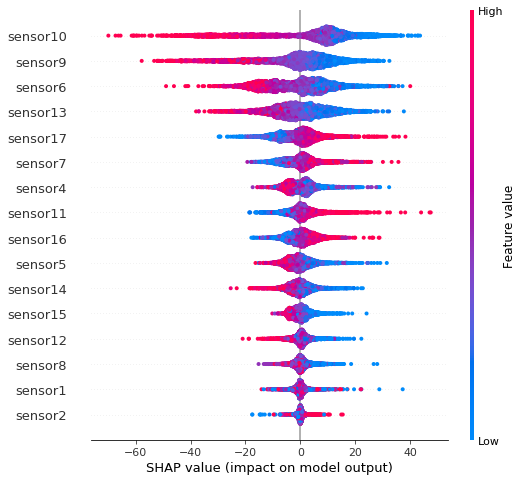

In [75]:
shap.summary_plot(shap_values, X_test)

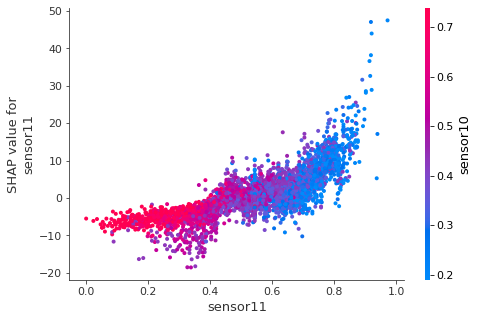

In [76]:
shap.dependence_plot("sensor11", shap_values, X_test)

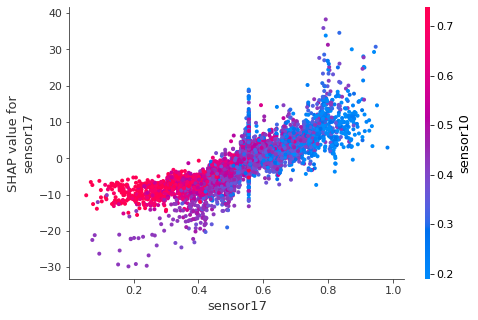

In [77]:
shap.dependence_plot("sensor17", shap_values, X_test)

Création real dataset et suppression cette dataset de notre dataset originale:

In [78]:
real=pd.DataFrame()
real=df.tail(2000)
real.set_index(real["DATE_CHARGEMENT"],inplace = True)
df.drop(df.tail(2000).index,inplace = True)
real.head()

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours,id,RUL
DATE_CHARGEMENT,,,,,,,,,,,,,,,,,,,,,
2021-02-15 22:00:00,2021-02-15 22:00:00,2021-02-15 22:00:00,2021-02-15 22:00:00,0.489959,0.666667,0.285266,0.398444,0.098951,0.630769,0.311111,...,0.999607,0.205171,0.298335,0.1,0.715596,0.554979,0,117,91,224
2021-02-15 23:00:00,2021-02-15 23:00:00,2021-02-15 23:00:00,2021-02-15 23:00:00,0.595745,0.333333,0.423197,0.393346,0.112450,0.583849,0.311111,...,0.999636,0.251965,0.492104,0.3,0.550459,0.717083,0,118,91,223
2021-02-16 00:00:00,2021-02-16 00:00:00,2021-02-16 00:00:00,2021-02-16 00:00:00,0.709220,0.333333,0.467085,0.316072,0.112450,0.782692,0.311111,...,0.999534,0.213990,0.375587,0.4,0.559633,0.708449,0,119,91,222
2021-02-16 01:00:00,2021-02-16 01:00:00,2021-02-16 01:00:00,2021-02-16 01:00:00,0.489957,0.166667,0.228840,0.411591,0.087211,0.500000,0.288889,...,0.999563,0.252625,0.378148,0.4,0.642202,0.723250,0,120,91,221
2021-02-16 02:00:00,2021-02-16 02:00:00,2021-02-16 02:00:00,2021-02-16 02:00:00,0.595745,0.333333,0.532915,0.466595,0.066117,0.583848,0.288889,...,0.999563,0.226588,0.301323,0.4,0.541284,0.621801,0,121,91,220


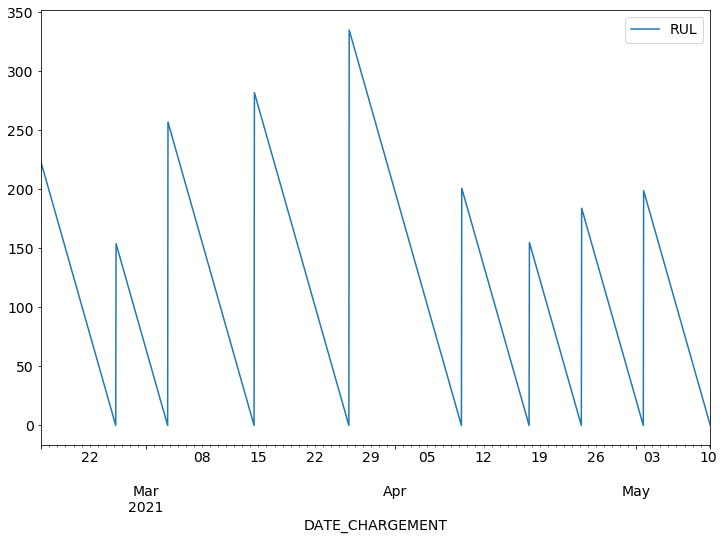

In [79]:
real.plot.line(y='RUL')

Random Forest Regression Model Sur notre originale dataset :

Toutes les Features :

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance



X=df.loc[:, 'sensor1':'sensor17']
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [81]:
df['predicted']=RF_predict.index

Affichage de Dataset :

In [82]:
df

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours,id,RUL,predicted
0,2019-01-09 16:00:00,2019-01-09 16:00:00,2019-01-09 16:00:00,0.492193,0.501985,0.447139,0.472630,0.114529,0.580089,0.398086,...,0.255927,0.480000,0.4,0.547139,0.554951,0,2,1,285,240.52
1,2019-01-09 17:00:00,2019-01-09 17:00:00,2019-01-09 17:00:00,0.494996,0.501985,0.449927,0.468812,0.057610,0.581842,0.395838,...,0.255927,0.480528,0.4,0.547062,0.552080,0,3,1,284,241.70
2,2019-01-09 18:00:00,2019-01-09 18:00:00,2019-01-09 18:00:00,0.737589,0.166667,0.134796,0.298632,0.043282,0.751923,0.394057,...,0.242966,0.305164,0.2,0.834862,0.882208,0,4,1,283,251.40
3,2019-01-09 19:00:00,2019-01-09 19:00:00,2019-01-09 19:00:00,0.524823,0.501985,0.150470,0.469260,0.075321,0.919231,0.244444,...,0.220349,0.240717,0.1,0.880734,0.759944,0,5,1,282,247.47
4,2019-01-09 20:00:00,2019-01-09 20:00:00,2019-01-09 20:00:00,0.418440,0.833333,0.015674,0.469627,0.046665,0.892308,0.266667,...,0.202232,0.212121,0.3,0.853211,0.765495,0,6,1,281,253.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18433,2021-02-15 17:00:00,2021-02-15 17:00:00,2021-02-15 17:00:00,0.631206,0.583333,0.300940,0.272874,0.099399,0.738462,0.244444,...,0.247285,0.479727,0.4,0.688073,0.554980,0,112,91,229,144.24
18434,2021-02-15 18:00:00,2021-02-15 18:00:00,2021-02-15 18:00:00,0.453901,1.000000,0.448276,0.328146,0.112452,0.701923,0.288889,...,0.201812,0.399915,0.2,0.568807,0.696269,0,113,91,228,147.36
18435,2021-02-15 19:00:00,2021-02-15 19:00:00,2021-02-15 19:00:00,0.489958,0.250000,0.294671,0.375101,0.069500,0.623077,0.288889,...,0.215970,0.379001,0.3,0.550459,0.753777,0,114,91,227,150.78
18436,2021-02-15 20:00:00,2021-02-15 20:00:00,2021-02-15 20:00:00,0.390071,0.583333,0.332288,0.464985,0.093230,0.809615,0.355556,...,0.214290,0.463935,0.3,0.688073,0.649090,0,115,91,226,150.29


In [83]:
df.set_index(df["DATE_CHARGEMENT"], inplace = True)

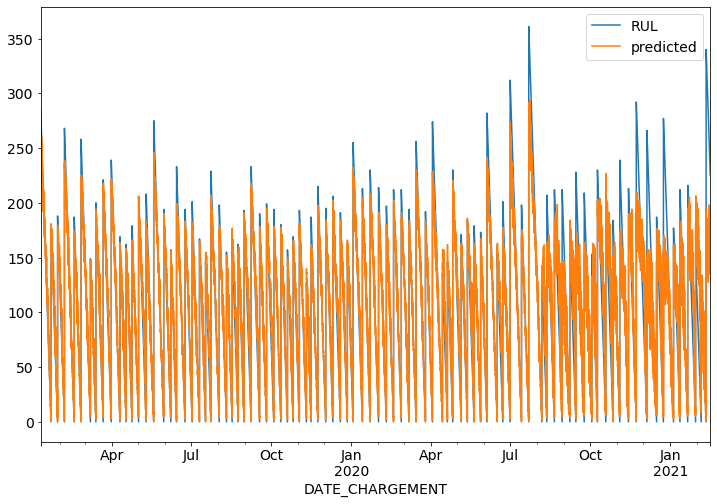

In [84]:
df[['RUL', 'predicted']].plot()

In [85]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, df.predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, df.predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, df.predicted, squared=False))

Mean Absolute Error (MAE): 15.747621759409915
Mean Squared Error (MSE): 661.3351485573273
Root Mean Squared Error (RMSE): 25.71643732240777


20% De Features Selection :

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


X=df[["sensor10", "sensor9"]]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0, shuffle=False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [87]:
df['predicted']=RF_predict.index

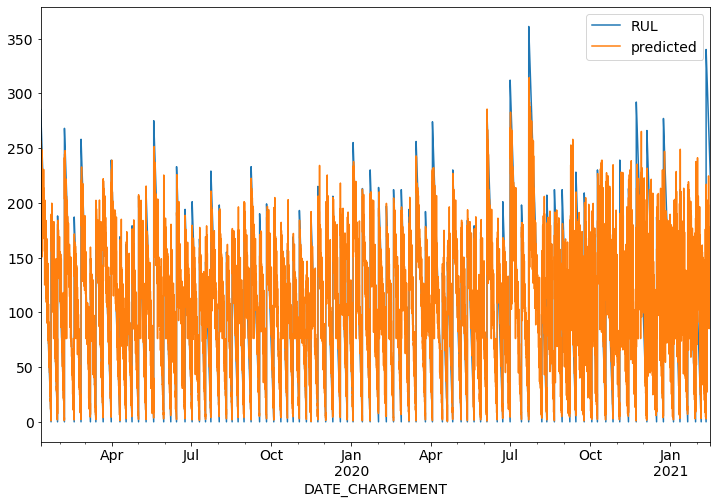

In [88]:
df[['RUL', 'predicted']].plot()

In [89]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, df.predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, df.predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, df.predicted, squared=False))

Mean Absolute Error (MAE): 22.062789265042653
Mean Squared Error (MSE): 1194.4791693813502
Root Mean Squared Error (RMSE): 34.56123796077551


30% De Features Selection :

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


X=df[["sensor10", "sensor9","sensor6","sensor11","sensor13"]]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [91]:
df['predicted']=RF_predict.index

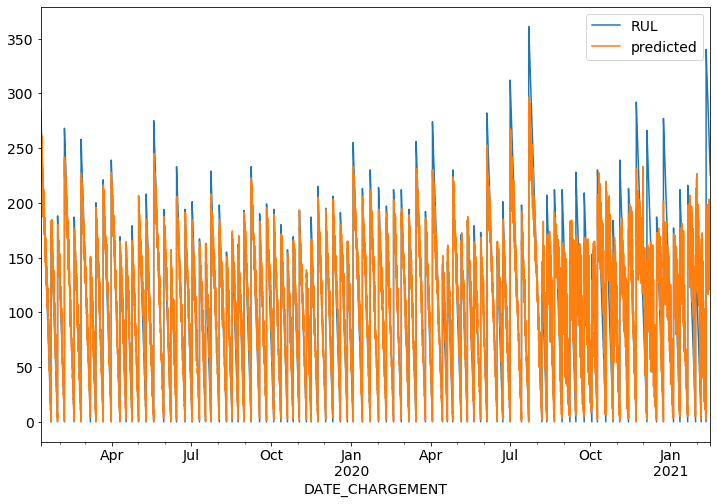

In [92]:
df[['RUL', 'predicted']].plot()

In [93]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, df.predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, df.predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, df.predicted, squared=False))

Mean Absolute Error (MAE): 16.485608562027696
Mean Squared Error (MSE): 725.5496865986429
Root Mean Squared Error (RMSE): 26.93602952550065


40% de features selection :

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


X=df[["sensor10", "sensor9","sensor6","sensor11","sensor13","sensor17"]]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [95]:
df['predicted']=RF_predict.index

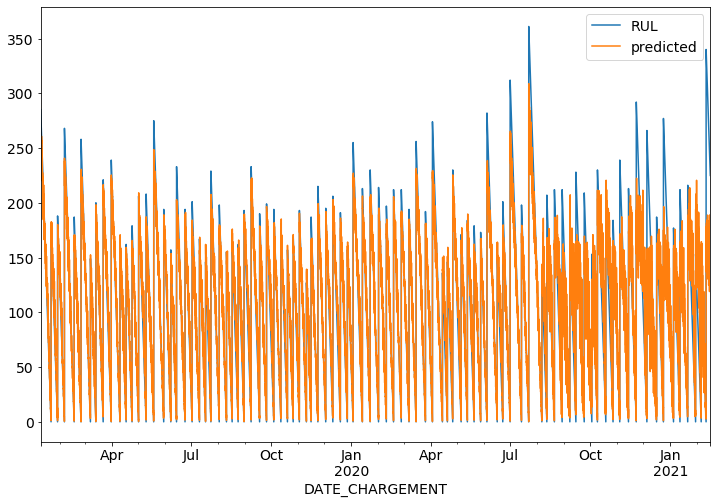

In [96]:
df[['RUL', 'predicted']].plot()

In [97]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, df.predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, df.predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, df.predicted, squared=False))

Mean Absolute Error (MAE): 16.261818526955203
Mean Squared Error (MSE): 705.8366556839137
Root Mean Squared Error (RMSE): 26.567586561144648


50% de features selection :

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


X=df[["sensor10", "sensor9","sensor6","sensor11","sensor13","sensor17","sensor14","sensor7"]]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [99]:
df['predicted']=RF_predict.index

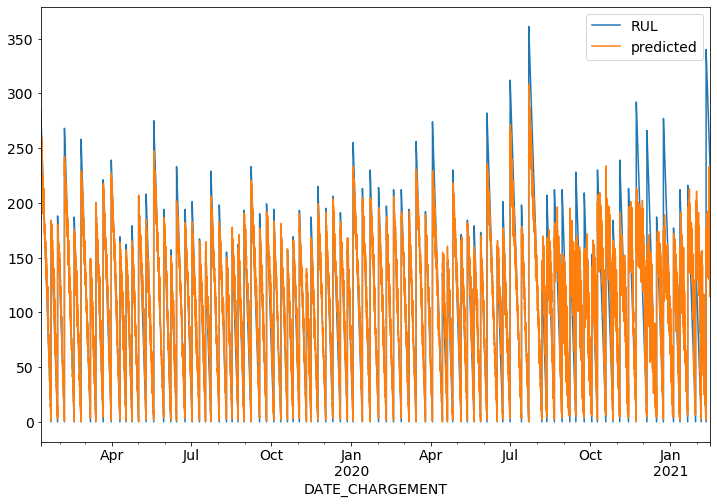

In [100]:
df[['RUL', 'predicted']].plot()

In [101]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, df.predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, df.predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, df.predicted, squared=False))

Mean Absolute Error (MAE): 15.996489315543986
Mean Squared Error (MSE): 683.3049067957479
Root Mean Squared Error (RMSE): 26.140101506990135


Random Forest Model sur Real Dataset :

Sur toutes les features selections :

In [102]:
X1 = np.asanyarray(real.loc[:, 'sensor1':'sensor17'])
y1 = np.asanyarray(real["RUL"])

In [103]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 39.48


,y1_test,y1_pred
0,60,55.45
1,44,78.27
2,191,146.05
3,77,82.26
4,172,176.16
5,134,104.49
6,153,136.61
7,30,14.59
8,145,116.39
9,41,73.28


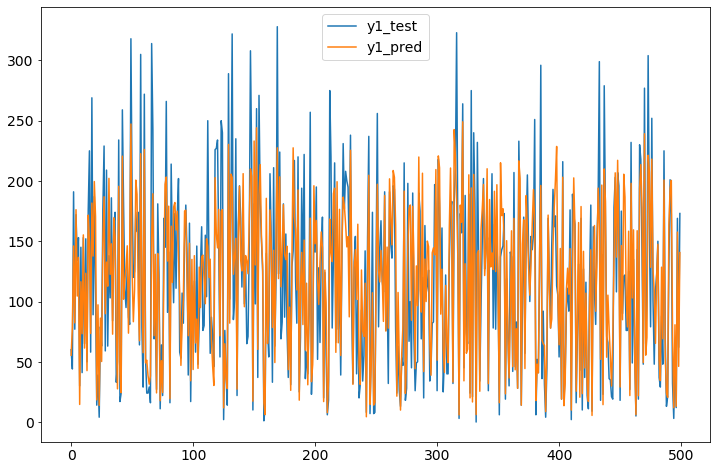

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

Sur 20% de features selection :

In [107]:
X1 = np.asanyarray(real[["sensor10", "sensor9"]])
y1 = np.asanyarray(real["RUL"])

In [108]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 54.38


,y1_test,y1_pred
0,13,14.740500
1,40,130.742500
2,130,149.250000
3,19,104.092667
4,15,15.813000
5,335,247.570000
6,166,108.822667
7,107,96.570000
8,44,46.160000
9,16,30.130000


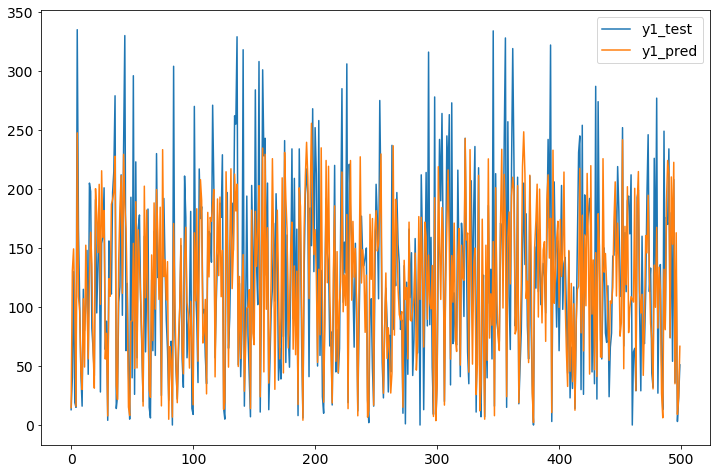

In [110]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

Sur 30% de features selection :

In [111]:
X1 = np.asanyarray(real[["sensor10", "sensor9","sensor6","sensor11","sensor13"]])
y1 = np.asanyarray(real["RUL"])

In [112]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 45.94


,y1_test,y1_pred
0,156,132.88
1,126,119.02
2,162,253.21
3,53,55.16
4,14,23.37
5,270,222.23
6,83,39.16
7,99,83.87
8,67,116.01
9,137,160.05


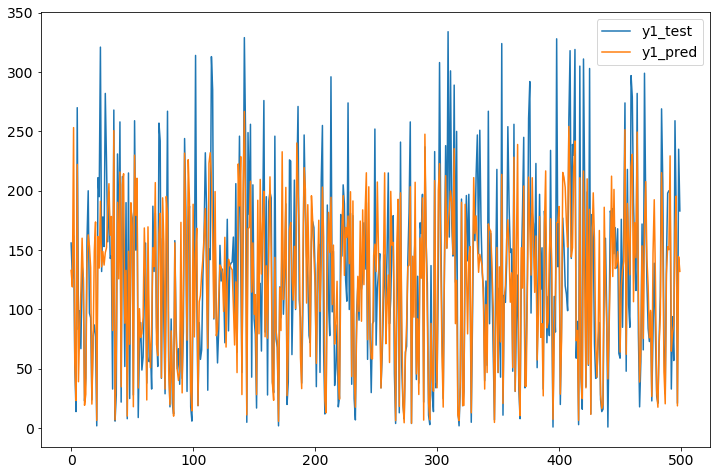

In [114]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

Sur 40% de features selection :

In [115]:
X1 = np.asanyarray(real[["sensor10", "sensor9","sensor6","sensor11","sensor13","sensor17"]])
y1 = np.asanyarray(real["RUL"])

In [116]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 42.00


,y1_test,y1_pred
0,128,176.67
1,39,48.56
2,38,44.38
3,92,58.32
4,116,86.58
5,36,97.21
6,189,207.18
7,173,195.92
8,45,44.09
9,65,172.67


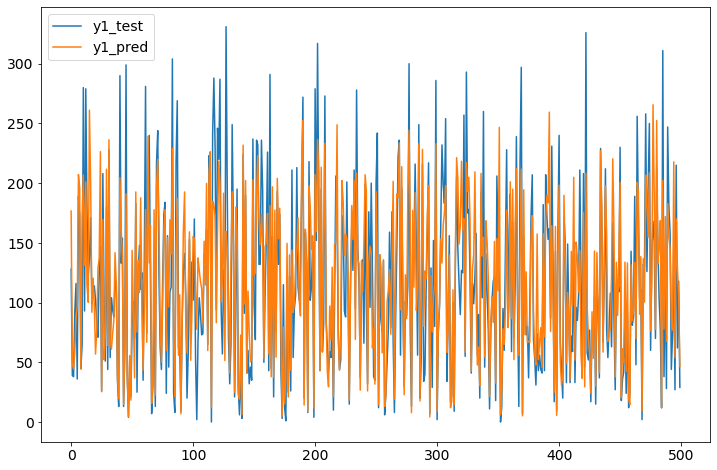

In [118]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

Sur 50% de features selection :

In [119]:
X1 = np.asanyarray(real[["sensor10", "sensor9","sensor6","sensor11","sensor13","sensor17","sensor14","sensor7"]])
y1 = np.asanyarray(real["RUL"])

In [120]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 40.72


,y1_test,y1_pred
0,21,23.67
1,4,8.92
2,33,49.92
3,139,138.98
4,203,157.40
5,292,216.53
6,122,136.70
7,190,121.79
8,22,34.24
9,192,199.80


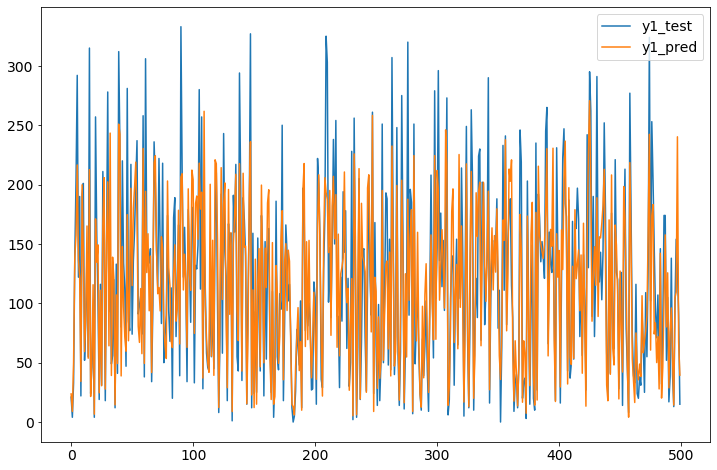

In [122]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

In [ ]:
#La deuxième méthode: Suppression des outliers

In [101]:
df = pd.read_csv(r'C:\Users\dell\Documents\Module_projet\out_suppp.csv')

In [102]:
df["DATE_RELEVEE"] = pd.to_datetime(df["DATE_RELEVEE"])
df["DATE_CHARGEMENT"] = pd.to_datetime(df["DATE_CHARGEMENT"])
df["DATE_DEMARRAGE"] = pd.to_datetime(df["DATE_DEMARRAGE"])

In [103]:
fr = df['PANNE'].eq(1)
df['hours'] = df['PANNE'].ne(1).groupby(fr.cumsum()).cumsum().add(1)
fr = df['PANNE'].eq(2)
df['id'] = df['PANNE'].ne(0).groupby(fr.cumsum()).cumsum().add(1)
rul = pd.DataFrame(df.groupby('id')['hours'].max()).reset_index()
rul.columns = ['id', 'max']
df = df.merge(rul, on=['id'], how='left')
df['RUL'] = df['max'] - df['hours']
df.drop('max', axis=1, inplace=True)
df

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours,id,RUL
0,2019-01-09 16:00:00,2019-01-09 16:00:00,2019-01-09 16:00:00,0.000007,0.000002,642.677809,1590.525286,1409.985165,553.375889,2388.096704,...,2388.095487,8142.600426,8.441938,393.201147,38.816799,23.29043,0,2,1,285
1,2019-01-09 17:00:00,2019-01-09 17:00:00,2019-01-09 17:00:00,0.000007,0.000002,642.677809,1590.525286,1398.960000,553.375889,2388.096704,...,2388.095487,8142.600426,8.441938,393.201147,38.816799,23.29043,0,3,1,284
2,2019-01-09 18:00:00,2019-01-09 18:00:00,2019-01-09 18:00:00,0.003500,-0.000400,641.680000,1584.150000,1396.080000,554.250000,2388.096704,...,2388.095487,8140.440000,8.401800,391.000000,39.130000,23.50270,0,4,1,283
3,2019-01-09 19:00:00,2019-01-09 19:00:00,2019-01-09 19:00:00,0.000500,0.000002,641.730000,1590.525286,1402.520000,555.120000,2388.030000,...,2387.940000,8136.670000,8.386700,390.000000,39.180000,23.42340,0,5,1,282
4,2019-01-09 20:00:00,2019-01-09 20:00:00,2019-01-09 20:00:00,-0.001000,0.000400,641.300000,1590.525286,1396.760000,554.980000,2388.040000,...,2387.990000,8133.650000,8.380000,392.000000,39.150000,23.42700,0,6,1,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20433,2021-05-10 01:00:00,2021-05-10 01:00:00,2021-05-10 01:00:00,-0.000400,-0.000300,643.490000,1597.980000,1428.630000,551.430000,2388.096704,...,2388.260000,8137.600000,8.441938,397.000000,38.490000,22.97350,0,196,99,4
20434,2021-05-10 02:00:00,2021-05-10 02:00:00,2021-05-10 02:00:00,-0.001600,-0.000500,643.540000,1604.500000,1433.580000,550.860000,2388.230000,...,2388.220000,8136.500000,8.513900,395.000000,38.300000,23.15940,0,197,99,3
20435,2021-05-10 03:00:00,2021-05-10 03:00:00,2021-05-10 03:00:00,0.000400,0.000000,643.420000,1602.460000,1428.180000,550.940000,2388.240000,...,2388.240000,8141.050000,8.564600,393.201147,38.816799,23.29043,0,198,99,2
20436,2021-05-10 04:00:00,2021-05-10 04:00:00,2021-05-10 04:00:00,0.000007,0.000002,642.677809,1590.525286,1426.530000,553.375889,2388.096704,...,2388.095487,8139.290000,8.441938,393.201147,38.816799,23.29043,0,199,99,1


In [104]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [105]:
real=pd.DataFrame()
real=df.tail(900)
real.set_index(real["DATE_CHARGEMENT"],inplace = True)
df.drop(df.tail(900).index,inplace = True)
real.head()

,DATE_CHARGEMENT,DATE_DEMARRAGE,DATE_RELEVEE,sensor1,sensor2,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,PANNE,hours,id,RUL
DATE_CHARGEMENT,,,,,,,,,,,,,,,,,,,,,
2021-04-02 18:00:00,2021-04-02 18:00:00,2021-04-02 18:00:00,2021-04-02 18:00:00,-0.0030,0.0000,642.610000,1592.04,1406.010000,553.57,2388.096704,...,2388.095487,8135.00,8.428200,393.0,39.03,23.3085,0,180,95,156
2021-04-02 19:00:00,2021-04-02 19:00:00,2021-04-02 19:00:00,2021-04-02 19:00:00,0.0000,-0.0002,642.280000,1594.59,1408.630000,553.48,2388.080000,...,2388.110000,8137.77,8.441938,392.0,38.93,23.2964,0,181,95,155
2021-04-02 20:00:00,2021-04-02 20:00:00,2021-04-02 20:00:00,2021-04-02 20:00:00,0.0013,0.0005,642.677809,1591.11,1409.340000,553.22,2388.060000,...,2388.060000,8137.52,8.451600,394.0,38.82,23.2967,0,182,95,154
2021-04-02 21:00:00,2021-04-02 21:00:00,2021-04-02 21:00:00,2021-04-02 21:00:00,-0.0011,0.0003,642.370000,1590.28,1409.985165,553.41,2388.050000,...,2388.070000,8132.57,8.435100,394.0,38.91,23.3311,0,183,95,153
2021-04-02 22:00:00,2021-04-02 22:00:00,2021-04-02 22:00:00,2021-04-02 22:00:00,-0.0023,-0.0002,642.430000,1590.95,1410.640000,554.28,2388.096704,...,2388.090000,8136.96,8.441938,393.0,38.82,23.3358,0,184,95,152


<AxesSubplot:xlabel='DATE_CHARGEMENT'>

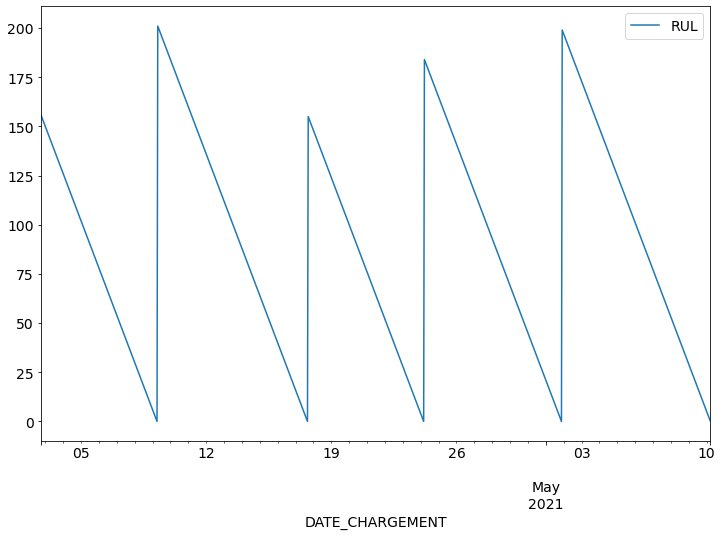

In [106]:
real.plot.line(y='RUL')

In [107]:
#Feature selection

In [108]:
X=df.loc[:, 'sensor1':'sensor17']
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [109]:
rf = RandomForestRegressor(n_estimators=100, random_state = 20)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=20)

In [110]:
rf.feature_importances_

array([0.02568047, 0.01575218, 0.03012869, 0.03214763, 0.12039174,
       0.03444395, 0.0200765 , 0.41744609, 0.04681768, 0.02250972,
       0.11382078, 0.04010294, 0.01078239, 0.02854329, 0.04135594])

Text(0.5, 0, 'Random Forest Feature Importance')

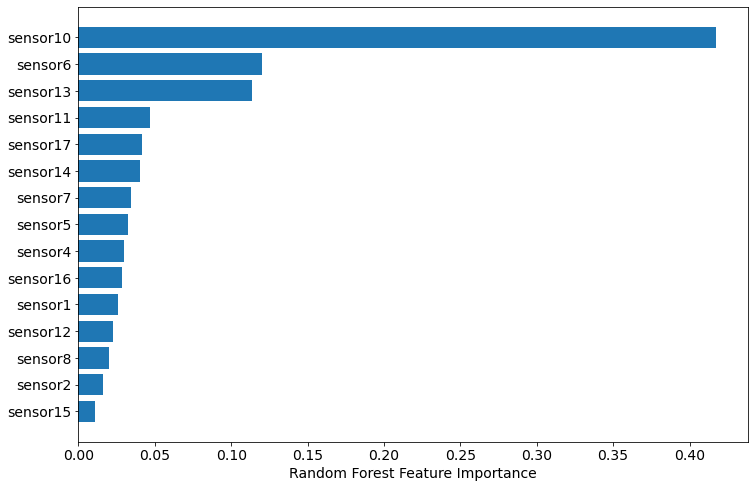

In [111]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.loc[:, 'sensor1':'sensor17'].columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
#Random forest en utilisant toutes les colonnes

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance



X=df.loc[:, 'sensor1':'sensor17']
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [113]:
df['predicted']=RF_predict.index

In [114]:
df.set_index(df["DATE_CHARGEMENT"], inplace = True)

<AxesSubplot:xlabel='DATE_CHARGEMENT'>

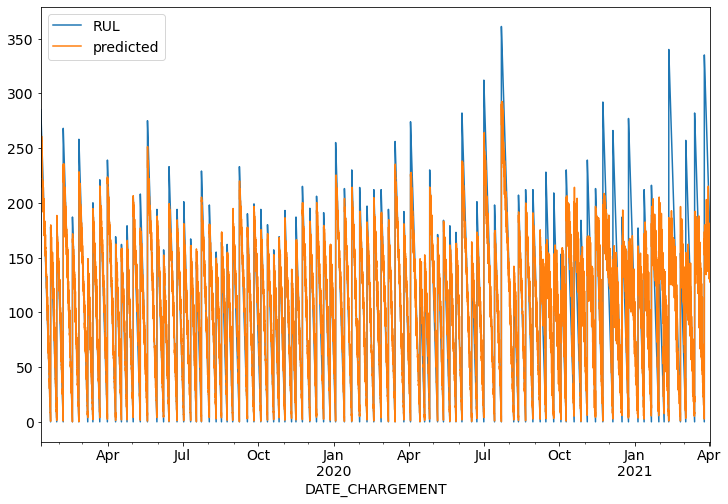

In [115]:
df[['RUL','predicted']].plot()

In [116]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, df.predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, df.predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, df.predicted, squared=False))

Mean Absolute Error (MAE): 16.830319377623095
Mean Squared Error (MSE): 794.6983231446412
Root Mean Squared Error (RMSE): 28.19039416440716


In [117]:
X1 = np.asanyarray(real.loc[:, 'sensor1':'sensor17'])
y1 = np.asanyarray(real["RUL"])

In [ ]:
#Avec 20% slon la feature selection

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


X=df[["sensor10", "sensor6"]]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0, shuffle=False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [119]:
df['predicted']=RF_predict.index

In [120]:
df.set_index(df["DATE_CHARGEMENT"], inplace = True)

<AxesSubplot:xlabel='DATE_CHARGEMENT'>

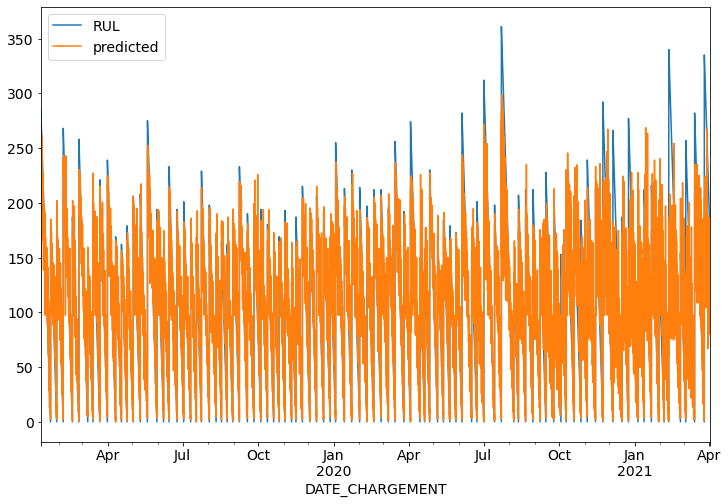

In [121]:
df[['RUL','predicted']].plot()

In [ ]:
#30% des colonnes selon feature selection:

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance



X=df[['sensor10','sensor6','sensor11','sensor13']]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [123]:
df['predicted']=RF_predict.index

In [124]:
df.set_index(df["DATE_CHARGEMENT"], inplace = True)

<AxesSubplot:xlabel='DATE_CHARGEMENT'>

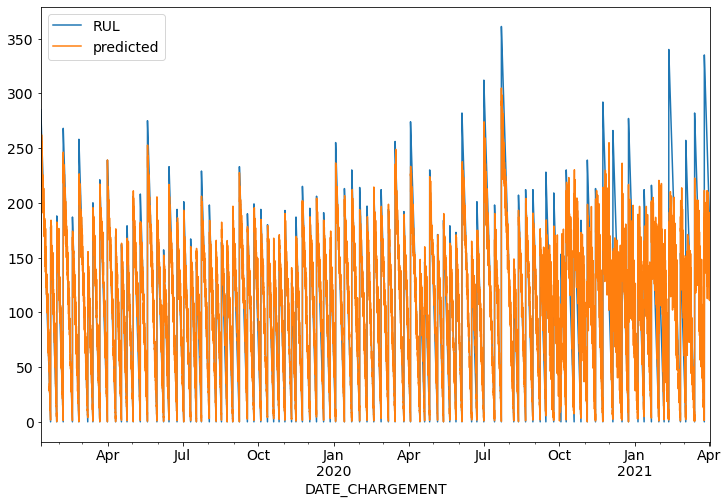

In [125]:
df[['RUL','predicted']].plot()

In [ ]:
#sur 40%

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance



X=df[['sensor10','sensor6','sensor11','sensor13','sensor17','sensor14']]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [127]:
df['predicted']=RF_predict.index

In [128]:
df.set_index(df["DATE_CHARGEMENT"], inplace = True)

<AxesSubplot:xlabel='DATE_CHARGEMENT'>

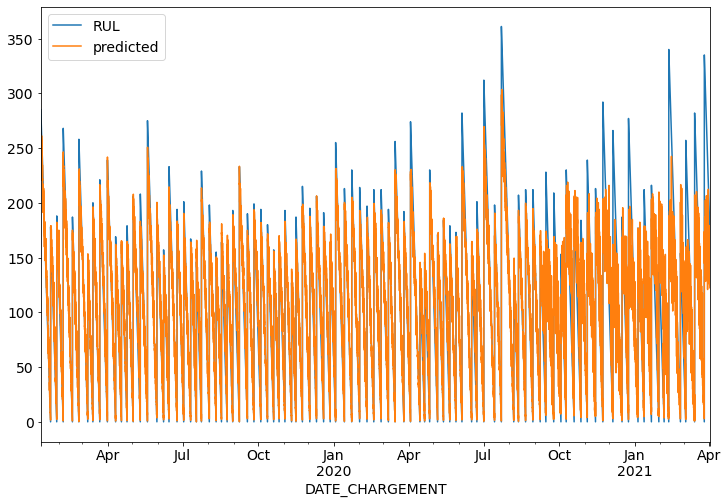

In [129]:
df[['RUL','predicted']].plot()

In [ ]:
#sur 50%

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance



X=df[['sensor10','sensor6','sensor11','sensor13','sensor17','sensor14','sensor7','sensor5']]
y = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

# build our RF model
RF_Model = RandomForestRegressor(random_state = 42)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train#[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_rul'}).set_index('predicted_rul')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [131]:
df['predicted']=RF_predict.index

In [132]:
df.set_index(df["DATE_CHARGEMENT"], inplace = True)

<AxesSubplot:xlabel='DATE_CHARGEMENT'>

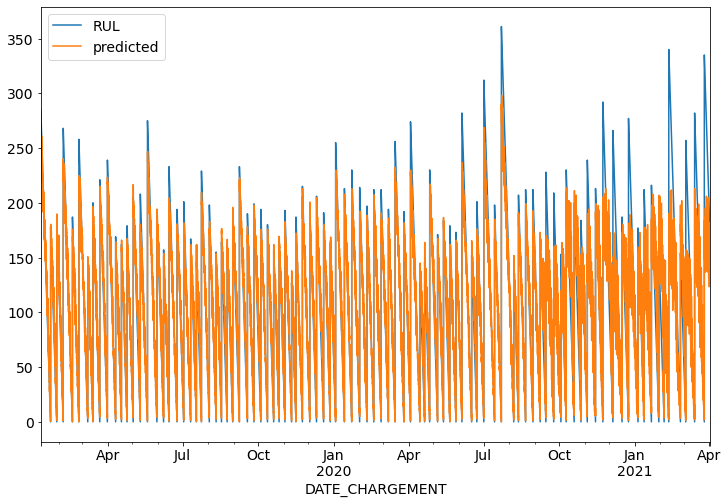

In [133]:
df[['RUL','predicted']].plot()

In [ ]:
#Sur Real dataset:

In [ ]:
#Sur toutes les colonnes

In [134]:
X1 = np.asanyarray(real.loc[:, 'sensor1':'sensor17'])
y1 = np.asanyarray(real["RUL"])

In [135]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 24.84


,y1_test,y1_pred
0,4,7.01
1,144,127.27
2,26,40.35
3,187,137.50
4,198,142.71
5,80,43.07
6,12,20.69
7,31,15.46
8,8,6.96
9,93,124.10


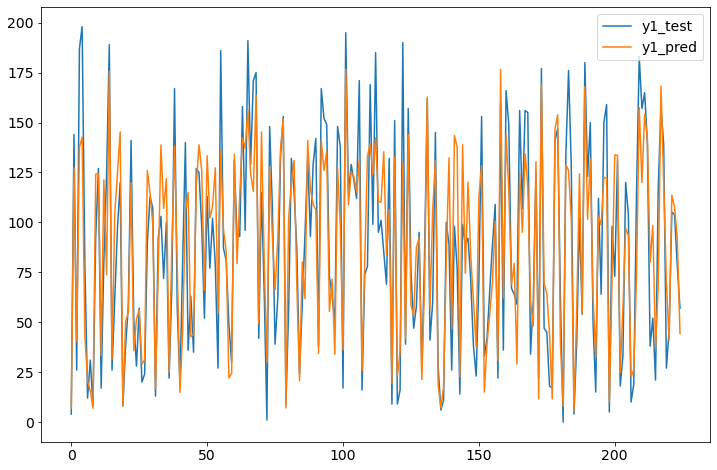

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

In [ ]:
#Sur 20%

In [138]:
X1 = np.asanyarray(real[['sensor10','sensor6']])
y1 = np.asanyarray(real["RUL"])

In [139]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 37.19


,y1_test,y1_pred
0,44,34.720000
1,67,102.830000
2,12,15.620000
3,30,8.530000
4,44,75.700000
5,175,138.510000
6,139,166.980000
7,106,146.791667
8,57,33.700000
9,89,133.250000


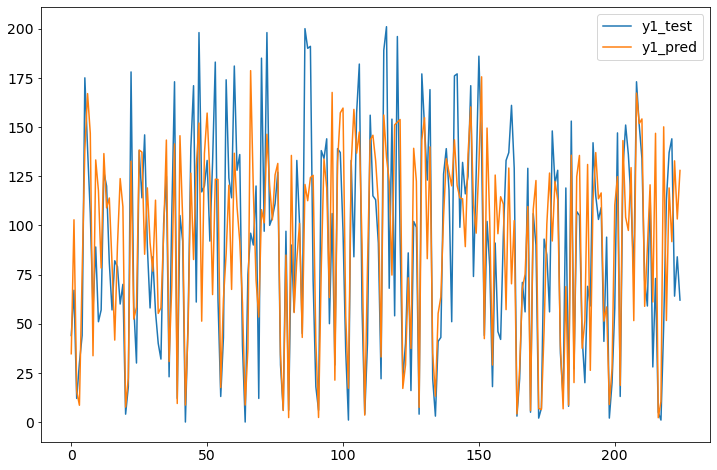

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

In [ ]:
#Sur30%

In [142]:
X1 = np.asanyarray(real[['sensor10','sensor6','sensor11','sensor13']])
y1 = np.asanyarray(real["RUL"])

In [143]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 28.08


,y1_test,y1_pred
0,107,88.69
1,33,68.28
2,7,4.82
3,118,133.94
4,153,167.00
5,126,144.93
6,65,62.22
7,75,79.57
8,28,16.59
9,77,31.35


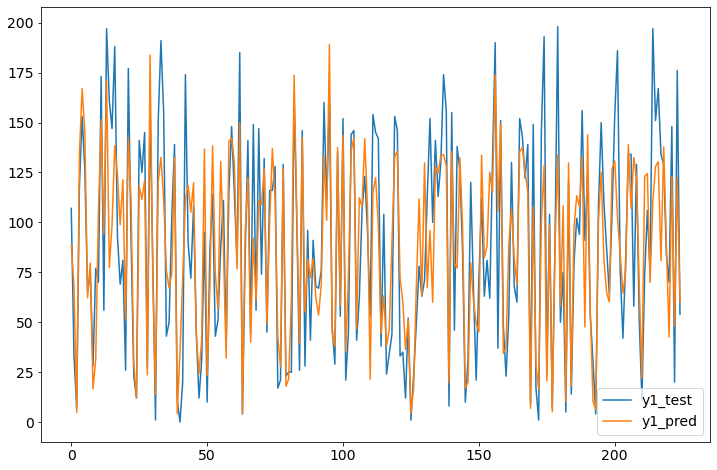

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

In [ ]:
#Sur40%

In [146]:
X1 = np.asanyarray(real[['sensor10','sensor6','sensor11','sensor13','sensor17','sensor14']])
y1 = np.asanyarray(real["RUL"])

In [147]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 44.45


,y1_test,y1_pred
0,178,122.93
1,42,40.77
2,10,12.40
3,107,110.35
4,298,188.81
5,75,101.94
6,125,142.52
7,46,44.40
8,69,109.39
9,152,169.88


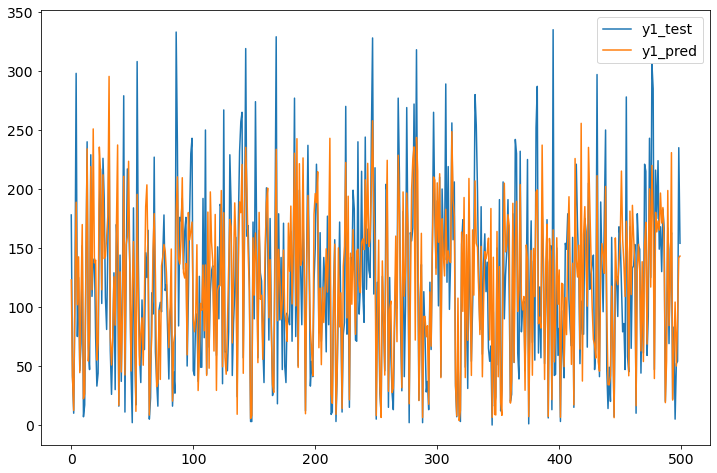

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)

In [ ]:
#sur 50%

In [153]:
X1 = np.asanyarray(real[['sensor10','sensor6','sensor11','sensor13','sensor17','sensor14','sensor7','sensor5']])
y1 = np.asanyarray(real["RUL"])

In [154]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, shuffle = True) 

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X1_train)
test_X = scaler.transform(X1_test)

rmse value is : 27.25


,y1_test,y1_pred
0,145,125.57
1,40,41.97
2,183,119.74
3,65,70.58
4,153,176.63
5,50,50.20
6,45,43.18
7,77,80.18
8,150,147.48
9,88,102.61


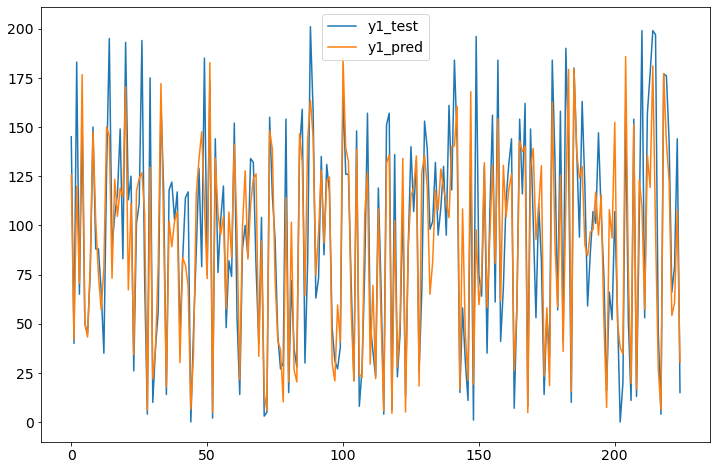

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(scaled_X, y1_train)
y1_pred = RF_Model.predict(test_X)
plot_pred = pd.DataFrame()
plot_pred['y1_test'] = y1_test
plot_pred['y1_pred'] = y1_pred
importance = RF_Model.feature_importances_
Rmse_rf = mean_squared_error(y1_test, y1_pred, squared = False)
print("rmse value is : {:.2f}".format(Rmse_rf))
plot_pred.plot.line(rot = 0)
plot_pred.head(10)